In [1]:
import pickle
import matplotlib.pyplot as plt
from scipy.special import logit
import numpy as np
import torch
import pickle
import io

In [2]:
def get_batch_mean_dev_loss(adam_dev_loss_list, dev_batch_size=25):
    counter = 0
    list_mean_dev_loss = []
    while counter < len(adam_dev_loss_list):
        batch_dev_loss = []
        for _ in range(dev_batch_size):
            batch_dev_loss.append(adam_dev_loss_list[counter])
        list_mean_dev_loss.append(sum(batch_dev_loss)/dev_batch_size)
        counter += dev_batch_size
    return list_mean_dev_loss

#len(list_mean_dev_loss)

# Optimisers
## Train

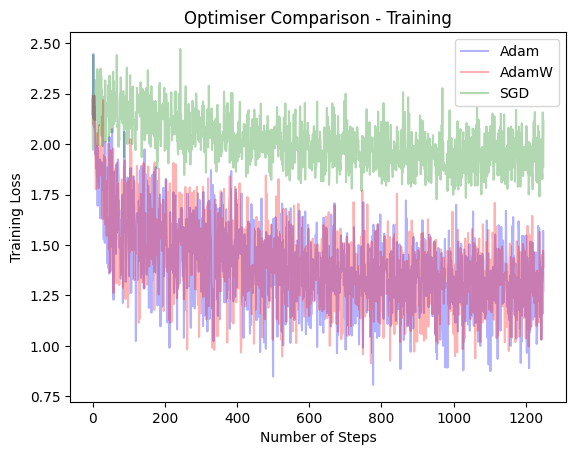

In [16]:
with open("Adam_wd0.001_10epochs_loss.p", "rb") as f:
    [adam_loss_list, _, _, adam_dev_loss_list,adam_div_loss_list] = pickle.load(f)

with open("AdamW_wd0.001_10epochs_loss.p", "rb") as f:
    [adamw_loss_list, _, _, adamw_dev_loss_list, _] = pickle.load(f)

with open("SGD_10epochs_loss.p", "rb") as f:
    [sgd_loss_list, _, _, sgd_dev_loss_list, _] = pickle.load(f)


loop = list(range(0, len(adam_loss_list)))
dev_loop = list(range(0, len(adam_dev_loss_list)))

list_mean_dev_loss = get_batch_mean_dev_loss(adam_dev_loss_list, 20)
mean_dev_loop = list(range(0, len(list_mean_dev_loss)))

plt.plot(loop, adam_loss_list, 'b', alpha=.3, label="Adam")

aloop = list(range(0, len(adamw_loss_list)))
adev_loop = list(range(0, len(adamw_dev_loss_list)))

plt.plot(aloop, adamw_loss_list, 'r', alpha=.3, label="AdamW")

sloop = list(range(0, len(sgd_loss_list)))
sdev_loop = list(range(0, len(sgd_dev_loss_list)))

plt.plot(sloop, sgd_loss_list, 'g', alpha=.3, label="SGD")


plt.title("Optimiser Comparison - Training")
#plt.ylim(bottom=0, top=4)
plt.xlabel("Number of Steps")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

## Validation

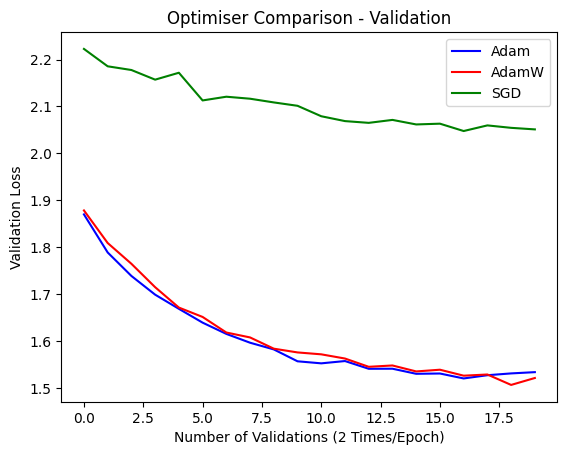

In [18]:
plt.plot(dev_loop, np.array(adam_dev_loss_list), 'b', label="Adam")
plt.plot(adev_loop, np.array(adamw_dev_loss_list), 'r', label="AdamW")
plt.plot(sdev_loop, np.array(sgd_dev_loss_list), 'g', label="SGD")
plt.title("Optimiser Comparison - Validation")
plt.xlabel("Number of Validations (2 Times/Epoch)")
plt.ylabel("Validation Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

# Learning Rate Scheduler
## Training

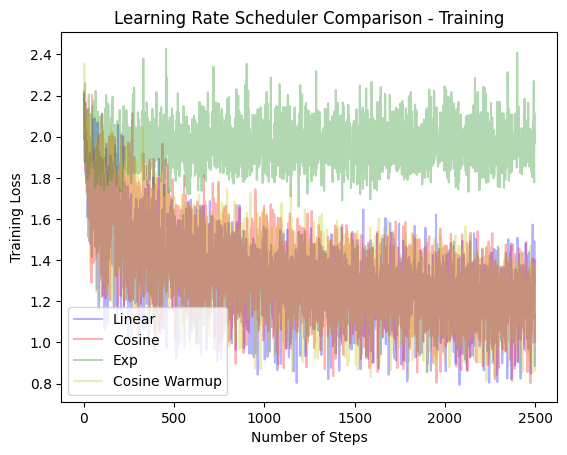

In [19]:
with open("LinearLR_20epochs_loss.p", "rb") as f:
    [linear_loss_list, _, _, linear_dev_loss_list,linear_div_loss_list] = pickle.load(f)

with open("CosineAnnealingLR_20epochs_loss.p", "rb") as f:
    [cosine_loss_list, _, _, cosine_dev_loss_list, _] = pickle.load(f)

with open("ExponentialLR_20epochs_loss.p", "rb") as f:
    [exp_loss_list, _, _, exp_dev_loss_list, _] = pickle.load(f)

with open("CosineAnnealingWarmRestarts_20epochs_loss.p", "rb") as f:
    [loss_list_4, _, _, dev_loss_list_4, _] = pickle.load(f)

loop = list(range(0, len(linear_loss_list)))
dev_loop = list(range(0, len(linear_dev_loss_list)))

list_mean_dev_loss = get_batch_mean_dev_loss(linear_dev_loss_list, 20)
mean_dev_loop = list(range(0, len(list_mean_dev_loss)))

plt.plot(loop, linear_loss_list, 'b', alpha=.3, label="Linear")

aloop = list(range(0, len(cosine_loss_list)))
adev_loop = list(range(0, len(cosine_dev_loss_list)))

plt.plot(aloop, cosine_loss_list, 'r', alpha=.3, label="Cosine")

sloop = list(range(0, len(exp_loss_list)))
sdev_loop = list(range(0, len(exp_dev_loss_list)))

plt.plot(sloop, exp_loss_list, 'g', alpha=.3, label="Exp")

loop4 = list(range(0, len(loss_list_4)))
dev_loop4 = list(range(0, len(dev_loss_list_4)))

plt.plot(loop4, loss_list_4, 'y', label="Cosine Warmup", alpha=.3)


plt.title("Learning Rate Scheduler Comparison - Training")
#plt.ylim(bottom=0, top=4)
plt.xlabel("Number of Steps")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

## Validation

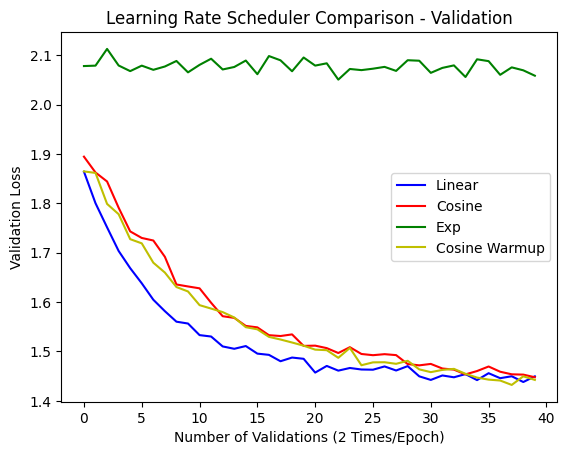

In [20]:
plt.plot(dev_loop, np.array(linear_dev_loss_list), 'b', label="Linear")
plt.plot(adev_loop, np.array(cosine_dev_loss_list), 'r', label="Cosine")
plt.plot(sdev_loop, np.array(exp_dev_loss_list), 'g', label="Exp")
plt.plot(dev_loop4, np.array(dev_loss_list_4), 'y', label="Cosine Warmup")
plt.title("Learning Rate Scheduler Comparison - Validation")
plt.xlabel("Number of Validations (2 Times/Epoch)")
plt.ylabel("Validation Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

# Batch Size
## Train

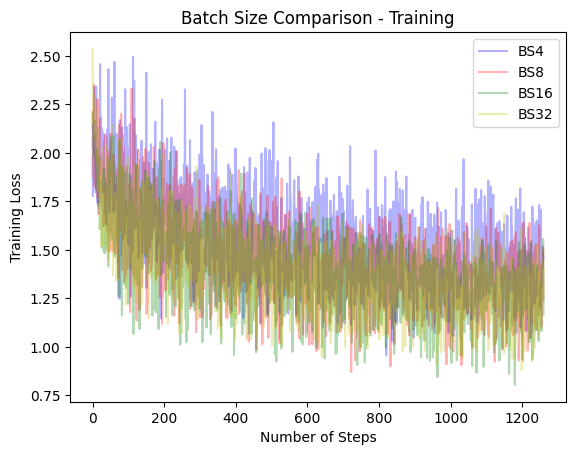

In [23]:
with open("BS4_20epochs_loss.p", "rb") as f:
    [linear_loss_list, _, _, linear_dev_loss_list,linear_div_loss_list] = pickle.load(f)

with open("BS8_20epochs_loss.p", "rb") as f:
    [cosine_loss_list, _, _, cosine_dev_loss_list, _] = pickle.load(f)

with open("BS16_20epochs_loss.p", "rb") as f:
    [exp_loss_list, _, _, exp_dev_loss_list, _] = pickle.load(f)

with open("BS32_20epochs_loss.p", "rb") as f:
    [loss_list_4, _, _, dev_loss_list_4, _] = pickle.load(f)

len4 = len(loss_list_4)
dlen4 = len(dev_loss_list_4)
loop = list(range(0, len(linear_loss_list)))
dev_loop = list(range(0, len(linear_dev_loss_list)))
loop4 = list(range(0, len(loss_list_4)))
dev_loop4 = list(range(0, len(dev_loss_list_4)))

list_mean_dev_loss = get_batch_mean_dev_loss(linear_dev_loss_list, 20)
mean_dev_loop = list(range(0, len(list_mean_dev_loss)))

plt.plot(loop4, linear_loss_list[:len4], 'b', alpha=.3, label="BS4")

aloop = list(range(0, len(cosine_loss_list)))
adev_loop = list(range(0, len(cosine_dev_loss_list)))

plt.plot(loop4, cosine_loss_list[:len4], 'r', alpha=.3, label="BS8")

sloop = list(range(0, len(exp_loss_list)))
sdev_loop = list(range(0, len(exp_dev_loss_list)))

plt.plot(loop4, exp_loss_list[:len4], 'g', alpha=.3, label="BS16")



plt.plot(loop4, loss_list_4[:len4], 'y', alpha=.3, label="BS32")


plt.title("Batch Size Comparison - Training")
plt.xlabel("Number of Steps")
plt.ylabel("Training Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

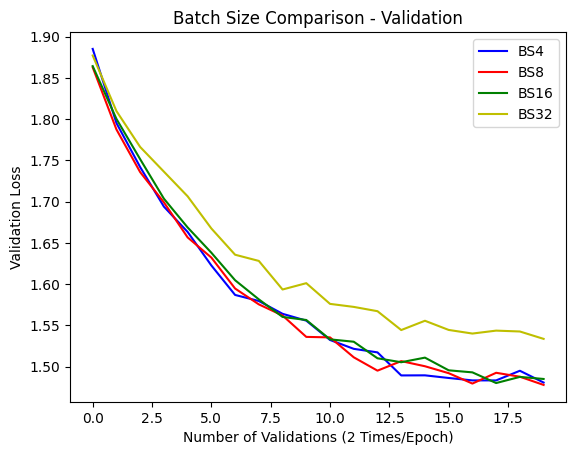

In [24]:
plt.plot(dev_loop4, np.array(linear_dev_loss_list)[:dlen4], 'b', label="BS4")
plt.plot(dev_loop4, np.array(cosine_dev_loss_list)[:dlen4], 'r', label="BS8")
plt.plot(dev_loop4, np.array(exp_dev_loss_list)[:dlen4], 'g', label="BS16")
plt.plot(dev_loop4, np.array(dev_loss_list_4)[:dlen4], 'y', label="BS32")
plt.title("Batch Size Comparison - Validation")
plt.xlabel("Number of Validations (2 Times/Epoch)")
plt.ylabel("Validation Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

# Learning Rate
## Training

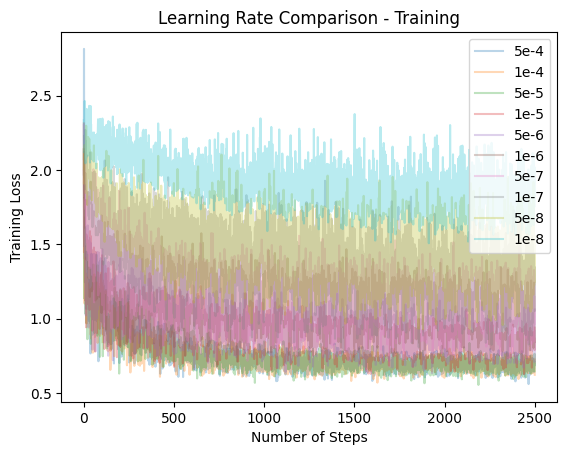

In [25]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#900C3F', '#4A328E']

with open("LR0.0005_20epochs_loss.p", "rb") as f:
    [lr_loss_list, _, _, lr_dev_loss_list,lr_div_loss_list] = pickle.load(f)

with open("LR0.0001_20epochs_loss.p", "rb") as f:
    [lr1_loss_list, _, _, lr1_dev_loss_list, _] = pickle.load(f)

with open("LR5e-05_20epochs_loss.p", "rb") as f:
    [lr2_loss_list, _, _, lr2_dev_loss_list, _] = pickle.load(f)

with open("LR1e-05_20epochs_loss.p", "rb") as f:
    [lr3_loss_list, _, _, lr3_dev_loss_list, _] = pickle.load(f)

with open("LR5e-06_30epochs_loss.p", "rb") as f:
    [lr4_loss_list, _, _, lr4_dev_loss_list, _] = pickle.load(f)

with open("LR1e-06_30epochs_loss.p", "rb") as f:
    [lr5_loss_list, _, _, lr5_dev_loss_list, _] = pickle.load(f)

with open("LR5e-07_30epochs_loss.p", "rb") as f:
    [lr6_loss_list, _, _, lr6_dev_loss_list, _] = pickle.load(f)

with open("LR1e-07_30epochs_loss.p", "rb") as f:
    [lr7_loss_list, _, _, lr7_dev_loss_list, _] = pickle.load(f)

with open("LR5e-08_20epochs_loss.p", "rb") as f:
    [lr8_loss_list, _, _, lr8_dev_loss_list, _] = pickle.load(f)

with open("LR1e-08_20epochs_loss.p", "rb") as f:
    [lr9_loss_list, _, _, lr9_dev_loss_list, _] = pickle.load(f)


lr_list = ["5e-4", "1e-4", "5e-5", "1e-5", "5e-6", "1e-6", "5e-7", "1e-7", "5e-8", "1e-8"]
lrlen = len(lr_loss_list)
lr_devlen = len(lr_dev_loss_list)
loop = list(range(0, len(lr_loss_list)))
dev_loop = list(range(0, len(lr_dev_loss_list)))

list_mean_dev_loss = get_batch_mean_dev_loss(lr_dev_loss_list, 20)
mean_dev_loop = list(range(0, len(list_mean_dev_loss)))
plt.plot(loop, lr_loss_list, color=colors[0], alpha=.3, label=lr_list[0])

aloop = list(range(0, len(lr1_loss_list)))
adev_loop = list(range(0, len(lr1_dev_loss_list)))
plt.plot(aloop, lr1_loss_list, color=colors[1], alpha=.3, label=lr_list[1])

sloop = list(range(0, len(lr2_loss_list)))
sdev_loop = list(range(0, len(lr2_dev_loss_list)))
plt.plot(sloop, lr2_loss_list, color=colors[2], alpha=.3, label=lr_list[2])

loop3 = list(range(0, len(lr3_loss_list)))
dev_loop3 = list(range(0, len(lr3_dev_loss_list)))
plt.plot(loop3, lr3_loss_list, color=colors[3], alpha=.3, label=lr_list[3])

loop4 = list(range(0, lrlen))
dev_loop4 = list(range(0, lr_devlen))
plt.plot(loop4, lr4_loss_list[:lrlen], color=colors[4], alpha=.3, label=lr_list[4])

loop5 = list(range(0, lrlen))
dev_loop5 = list(range(0, lr_devlen))
plt.plot(loop5, lr5_loss_list[:lrlen], color=colors[5], alpha=.3, label=lr_list[5])

loop6 = list(range(0, lrlen))
dev_loop6 = list(range(0, lr_devlen))
plt.plot(loop6, lr6_loss_list[:lrlen], color=colors[6], alpha=.3, label=lr_list[6])

loop7 = list(range(0, lrlen))
dev_loop7 = list(range(0, lr_devlen))
plt.plot(loop7, lr7_loss_list[:lrlen], color=colors[7], alpha=.3, label=lr_list[7])

loop8 = list(range(0, len(lr8_loss_list)))
dev_loop8 = list(range(0, len(lr8_dev_loss_list)))
plt.plot(loop8, lr8_loss_list, color=colors[8], alpha=.3, label=lr_list[8])

loop9 = list(range(0, len(lr9_loss_list)))
dev_loop9 = list(range(0, len(lr9_dev_loss_list)))
plt.plot(loop9, lr9_loss_list, color=colors[9], alpha=.3, label=lr_list[9])

plt.title("Learning Rate Comparison - Training")
plt.xlabel("Number of Steps")
plt.ylabel("Training Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

## Validation

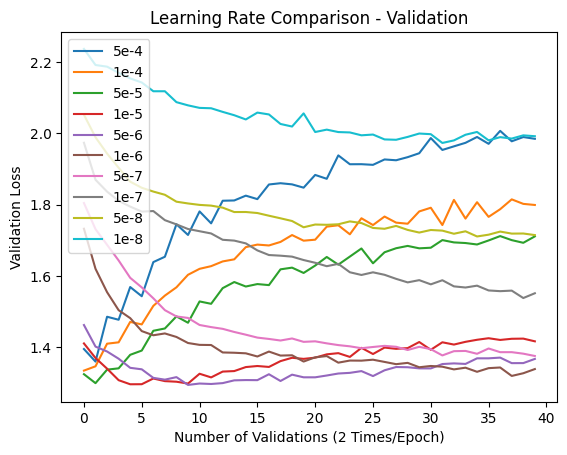

In [26]:
plt.plot(dev_loop, np.array(lr_dev_loss_list), color=colors[0], label=lr_list[0])
plt.plot(adev_loop, np.array(lr1_dev_loss_list), color=colors[1], label=lr_list[1])
plt.plot(sdev_loop, np.array(lr2_dev_loss_list), color=colors[2], label=lr_list[2])
plt.plot(dev_loop3, np.array(lr3_dev_loss_list), color=colors[3], label=lr_list[3])
plt.plot(dev_loop4, np.array(lr4_dev_loss_list[:lr_devlen]), color=colors[4], label=lr_list[4])
plt.plot(dev_loop5, np.array(lr5_dev_loss_list[:lr_devlen]), color=colors[5], label=lr_list[5])
plt.plot(dev_loop6, np.array(lr6_dev_loss_list[:lr_devlen]), color=colors[6], label=lr_list[6])
plt.plot(dev_loop7, np.array(lr7_dev_loss_list[:lr_devlen]), color=colors[7], label=lr_list[7])
plt.plot(dev_loop8, np.array(lr8_dev_loss_list), color=colors[8], label=lr_list[8])
plt.plot(dev_loop9, np.array(lr9_dev_loss_list), color=colors[9], label=lr_list[9])
plt.title("Learning Rate Comparison - Validation")
plt.xlabel("Number of Validations (2 Times/Epoch)")
plt.ylabel("Validation Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

# Weights

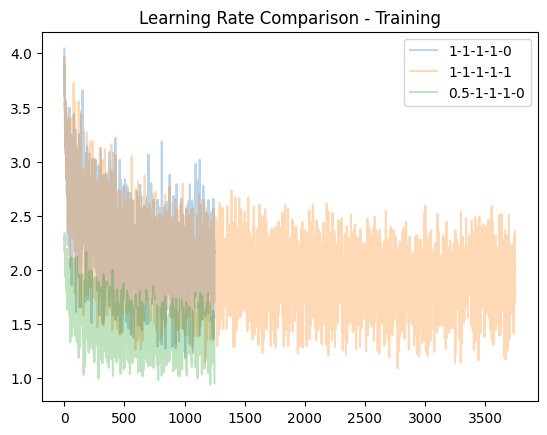

In [5]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#900C3F', '#4A328E']

with open("w1-1-1-1-0_10epochs_loss.p", "rb") as f:
    [lr_loss_list, _, _, lr_dev_loss_list,lr_div_loss_list] = pickle.load(f)

with open("w1-1-1-1-1_30epochs_loss.p", "rb") as f:
    [lr1_loss_list, _, _, lr1_dev_loss_list, _] = pickle.load(f)

with open("w0.5-1.0-1.0-1.0-0.0_10epochs_loss.p", "rb") as f:
    [lr2_loss_list, _, _, lr2_dev_loss_list, _] = pickle.load(f)

with open("LR1e-05_20epochs_loss.p", "rb") as f:
    [lr3_loss_list, _, _, lr3_dev_loss_list, _] = pickle.load(f)

with open("LR5e-06_30epochs_loss.p", "rb") as f:
    [lr4_loss_list, _, _, lr4_dev_loss_list, _] = pickle.load(f)

with open("LR1e-06_30epochs_loss.p", "rb") as f:
    [lr5_loss_list, _, _, lr5_dev_loss_list, _] = pickle.load(f)

with open("LR5e-07_20epochs_loss.p", "rb") as f:
    [lr6_loss_list, _, _, lr6_dev_loss_list, _] = pickle.load(f)

with open("LR1e-07_30epochs_loss.p", "rb") as f:
    [lr7_loss_list, _, _, lr7_dev_loss_list, _] = pickle.load(f)

with open("LR5e-08_20epochs_loss.p", "rb") as f:
    [lr8_loss_list, _, _, lr8_dev_loss_list, _] = pickle.load(f)

with open("LR1e-08_20epochs_loss.p", "rb") as f:
    [lr9_loss_list, _, _, lr9_dev_loss_list, _] = pickle.load(f)


lr_list = ["1-1-1-1-0", "1-1-1-1-1", "0.5-1-1-1-0", "1e-5", "5e-6", "1e-6", "5e-7", "1e-7", "5e-8", "1e-8"]
loop = list(range(0, len(lr_loss_list)))
dev_loop = list(range(0, len(lr_dev_loss_list)))

list_mean_dev_loss = get_batch_mean_dev_loss(lr_dev_loss_list, 20)
mean_dev_loop = list(range(0, len(list_mean_dev_loss)))
plt.plot(loop, lr_loss_list, color=colors[0], alpha=.3, label=lr_list[0])

aloop = list(range(0, len(lr1_loss_list)))
adev_loop = list(range(0, len(lr1_dev_loss_list)))
plt.plot(aloop, lr1_loss_list, color=colors[1], alpha=.3, label=lr_list[1])

sloop = list(range(0, len(lr2_loss_list)))
sdev_loop = list(range(0, len(lr2_dev_loss_list)))
plt.plot(sloop, lr2_loss_list, color=colors[2], alpha=.3, label=lr_list[2])
"""
loop3 = list(range(0, len(lr3_loss_list)))
dev_loop3 = list(range(0, len(lr3_dev_loss_list)))

plt.plot(loop3, lr3_loss_list, color=colors[3], alpha=.3, label=lr_list[3])

loop4 = list(range(0, len(lr4_loss_list)))
dev_loop4 = list(range(0, len(lr4_dev_loss_list)))
plt.plot(loop4, lr4_loss_list, color=colors[4], alpha=.3, label=lr_list[4])

loop5 = list(range(0, len(lr5_loss_list)))
dev_loop5 = list(range(0, len(lr5_dev_loss_list)))
plt.plot(loop5, lr5_loss_list, color=colors[5], alpha=.3, label=lr_list[5])

loop6 = list(range(0, len(lr6_loss_list)))
dev_loop6 = list(range(0, len(lr6_dev_loss_list)))
plt.plot(loop6, lr6_loss_list, color=colors[6], alpha=.3, label=lr_list[6])

loop7 = list(range(0, len(lr7_loss_list)))
dev_loop7 = list(range(0, len(lr7_dev_loss_list)))
plt.plot(loop7, lr7_loss_list, color=colors[7], alpha=.3, label=lr_list[7])

loop8 = list(range(0, len(lr8_loss_list)))
dev_loop8 = list(range(0, len(lr8_dev_loss_list)))
plt.plot(loop8, lr8_loss_list, color=colors[8], alpha=.3, label=lr_list[8])

loop9 = list(range(0, len(lr9_loss_list)))
dev_loop9 = list(range(0, len(lr9_dev_loss_list)))
plt.plot(loop9, lr9_loss_list, color=colors[9], alpha=.3, label=lr_list[9])
"""
plt.title("Learning Rate Comparison - Training")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

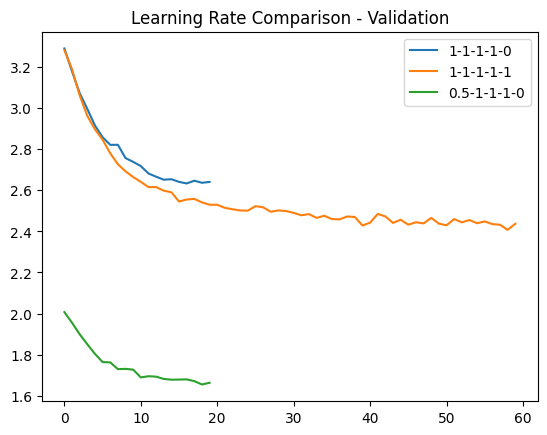

In [75]:
plt.plot(dev_loop, np.array(lr_dev_loss_list), color=colors[0], label=lr_list[0])
plt.plot(adev_loop, np.array(lr1_dev_loss_list), color=colors[1], label=lr_list[1])
plt.plot(sdev_loop, np.array(lr2_dev_loss_list), color=colors[2], label=lr_list[2])
"""

plt.plot(dev_loop3, np.array(lr3_dev_loss_list), color=colors[3], label=lr_list[3])
plt.plot(dev_loop4, np.array(lr4_dev_loss_list), color=colors[4], label=lr_list[4])
plt.plot(dev_loop5, np.array(lr5_dev_loss_list), color=colors[5], label=lr_list[5])
plt.plot(dev_loop6, np.array(lr6_dev_loss_list), color=colors[6], label=lr_list[6])
plt.plot(dev_loop7, np.array(lr7_dev_loss_list), color=colors[7], label=lr_list[7])
plt.plot(dev_loop8, np.array(lr8_dev_loss_list), color=colors[8], label=lr_list[8])
plt.plot(dev_loop9, np.array(lr9_dev_loss_list), color=colors[9], label=lr_list[9])
"""
plt.title("Learning Rate Comparison - Validation")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

# With vs Without Perplexity
## Training

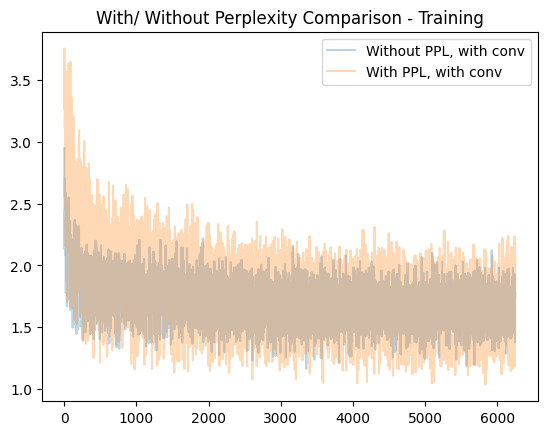

In [11]:
with open("w0.5-2.0-1.0-2.0-0.0_50epochs_loss.p", "rb") as f:
    [lr_loss_list, _, _, lr_dev_loss_list,lr_div_loss_list] = pickle.load(f)

with open("w1-1-1-1-0_50epochs_loss.p", "rb") as f:
    [lr1_loss_list, _, _, lr1_dev_loss_list, _] = pickle.load(f)
#FTM15-8-local_conv_LinearLR_Adam_wd0.001_vckp62_ED_ts2000_bs16_lr5e-07_w0.5-2.0-1.0-0.5-0.5_FACE_norm_sim_loss_10epochs_loss.p
loop = list(range(0, len(lr_loss_list)))
dev_loop = list(range(0, len(lr_dev_loss_list)))
plt.plot(loop, lr_loss_list, color=colors[0], alpha=.3, label="Without PPL, with conv")

aloop = list(range(0, len(lr_loss_list)))
adev_loop = list(range(0, len(lr_dev_loss_list)))
plt.plot(aloop, lr1_loss_list[:len(lr_loss_list)], color=colors[1], alpha=.3, label="With PPL, with conv")


plt.title("With/ Without Perplexity Comparison - Training")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

## Validation

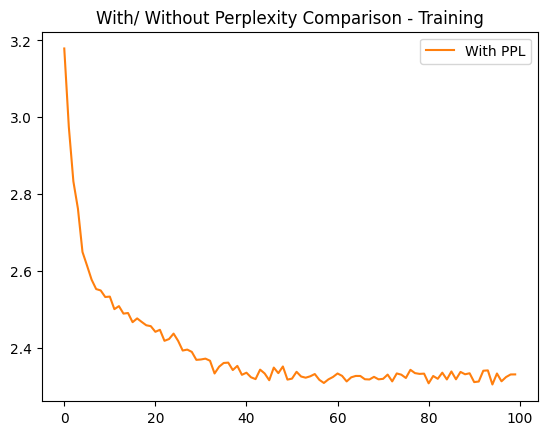

In [13]:
#plt.plot(dev_loop, np.array(lr_dev_loss_list), color=colors[0], label="Without PPL")
plt.plot(adev_loop, np.array(lr1_dev_loss_list[:len(lr_dev_loss_list)]), color=colors[1], label="With PPL")
plt.title("With/ Without Perplexity Comparison - Training")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

# Context Comparison
## Training

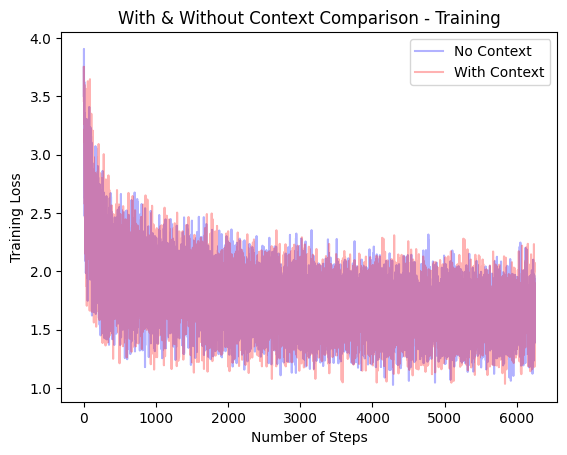

In [31]:
with open("no_conv_50epochs_loss.p", "rb") as f:
    [adam_loss_list, _, _, adam_dev_loss_list,adam_div_loss_list] = pickle.load(f)

with open("w1-1-1-1-0_50epochs_loss.p", "rb") as f:
    [adamw_loss_list, _, _, adamw_dev_loss_list, _] = pickle.load(f)

with open("SGD_10epochs_loss.p", "rb") as f:
    [sgd_loss_list, _, _, sgd_dev_loss_list, _] = pickle.load(f)

with open("LR5e-06_30epochs_loss.p", "rb") as f:
    [lr4_loss_list, _, _, lr4_dev_loss_list, _] = pickle.load(f)


loop = list(range(0, len(adam_loss_list)))
dev_loop = list(range(0, len(adam_dev_loss_list)))

list_mean_dev_loss = get_batch_mean_dev_loss(adam_dev_loss_list, 20)
mean_dev_loop = list(range(0, len(list_mean_dev_loss)))

plt.plot(loop, adam_loss_list, 'b', alpha=.3, label="No Context")

aloop = list(range(0, len(adamw_loss_list)))
adev_loop = list(range(0, len(adamw_dev_loss_list)))

plt.plot(aloop, adamw_loss_list, 'r', alpha=.3, label="With Context")

sloop = list(range(0, len(sgd_loss_list)))
sdev_loop = list(range(0, len(sgd_dev_loss_list)))

#plt.plot(sloop, sgd_loss_list, 'g', alpha=.3, label="SGD")


plt.title("With & Without Context Comparison - Training")
#plt.ylim(bottom=0, top=4)
plt.xlabel("Number of Steps")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

## Validation

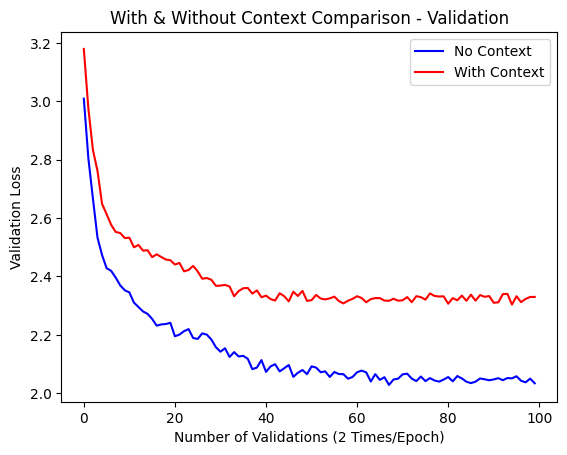

In [32]:
plt.plot(dev_loop, np.array(adam_dev_loss_list), 'b', label="No Context")
plt.plot(adev_loop, np.array(adamw_dev_loss_list), 'r', label="With Context")
#plt.plot(sdev_loop, np.array(sgd_dev_loss_list), 'g', label="SGD")
plt.title("With & Without Context Comparison - Validation")
plt.xlabel("Number of Validations (2 Times/Epoch)")
plt.ylabel("Validation Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

## BLEURT Score

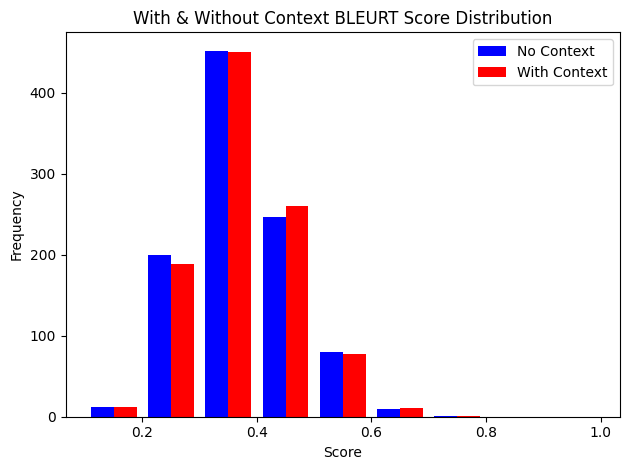

In [66]:
import numpy as np
import matplotlib.pyplot as plt

with open("no_conv_50epochs-5250-loss1.26051_bleurt_scores.p", "rb") as f:
    [blenderbot_bleurt_scores] = pickle.load(f)

with open("w1-1-1-1-0_50epochs-4250-loss1.32314_bleurt_scores.p", "rb") as f:
    [ft_bleurt_scores] = pickle.load(f)

n_bins = 10
bins = np.array(range(1, 11)) / 10

fig, ((ax0)) = plt.subplots(nrows=1, ncols=1)

colors = ['b', 'r']#['red', 'b', 'y']
labels = ["No Context", "With Context"]
ax0.hist([blenderbot_bleurt_scores, ft_bleurt_scores], bins=bins, density=False, histtype='bar', color=colors, label=labels)
ax0.legend(prop={'size': 10})
plt.xlabel("Score")
plt.ylabel("Frequency")
ax0.set_title('With & Without Context BLEURT Score Distribution')

fig.tight_layout()
plt.show()

# Dataset Choice
## Training

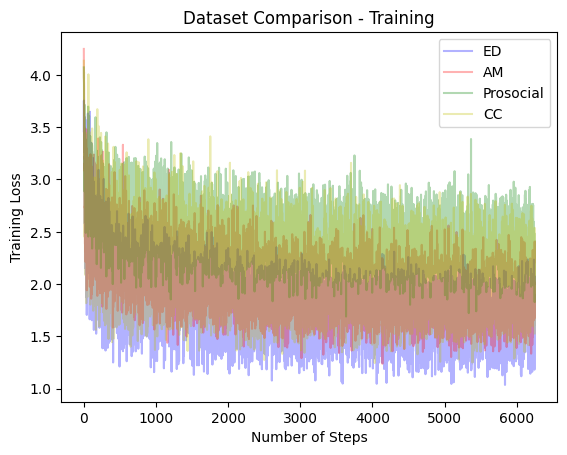

In [36]:
with open("w1-1-1-1-0_50epochs_loss.p", "rb") as f:
    [adam_loss_list, _, _, adam_dev_loss_list,adam_div_loss_list] = pickle.load(f)

with open("AM_50epochs_loss.p", "rb") as f:
    [adamw_loss_list, _, _, adamw_dev_loss_list, _] = pickle.load(f)

with open("Prosocial_50epochs_loss.p", "rb") as f:
    [sgd_loss_list, _, _, sgd_dev_loss_list, _] = pickle.load(f)

with open("CC_50epochs_loss.p", "rb") as f:
    [lr3_loss_list, _, _, lr3_dev_loss_list, _] = pickle.load(f)

loop = list(range(0, len(adam_loss_list)))
dev_loop = list(range(0, len(adam_dev_loss_list)))
plt.plot(loop, adam_loss_list, 'b', alpha=.3, label="ED")

aloop = list(range(0, len(adamw_loss_list)))
adev_loop = list(range(0, len(adamw_dev_loss_list)))

plt.plot(aloop, adamw_loss_list, 'r', alpha=.3, label="AM")

sloop = list(range(0, len(sgd_loss_list)))
sdev_loop = list(range(0, len(sgd_dev_loss_list)))
plt.plot(sloop, sgd_loss_list, 'g', alpha=.3, label="Prosocial")

loop3 = list(range(0, len(lr3_loss_list)))
dev_loop3 = list(range(0, len(lr3_dev_loss_list)))
plt.plot(loop3, lr3_loss_list, color='y', alpha=.3, label="CC")


plt.title("Dataset Comparison - Training")
#plt.ylim(bottom=0, top=4)
plt.xlabel("Number of Steps")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

## Validation

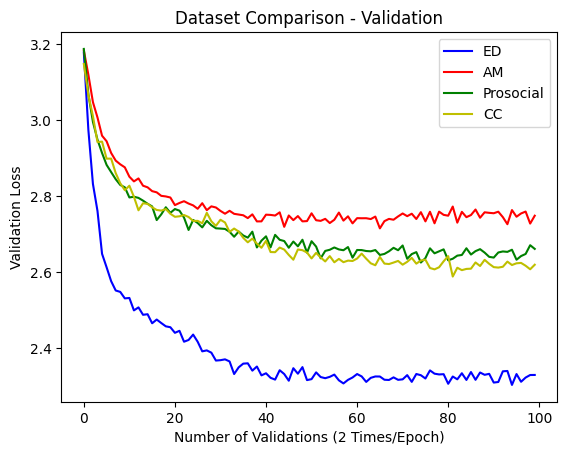

In [37]:
plt.plot(dev_loop, np.array(adam_dev_loss_list), 'b', label="ED")
plt.plot(adev_loop, np.array(adamw_dev_loss_list), 'r', label="AM")
plt.plot(sdev_loop, np.array(sgd_dev_loss_list), 'g', label="Prosocial")
plt.plot(dev_loop3, np.array(lr3_dev_loss_list), color='y', label="CC")
plt.title("Dataset Comparison - Validation")
plt.xlabel("Number of Validations (2 Times/Epoch)")
plt.ylabel("Validation Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

# BLEURT Score Distribution

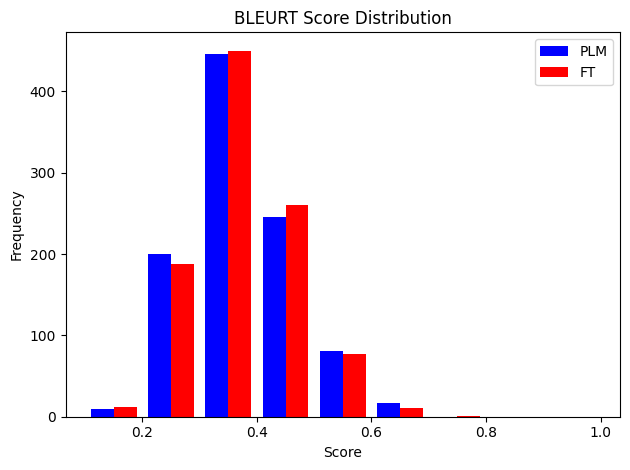

In [56]:
import numpy as np
import matplotlib.pyplot as plt

with open("blenderbot_bleurt_scores.p", "rb") as f:
    [blenderbot_bleurt_scores] = pickle.load(f)

with open("w1-1-1-1-0_50epochs-4250-loss1.32314_bleurt_scores.p", "rb") as f:
    [ft_bleurt_scores] = pickle.load(f)

n_bins = 10
bins = np.array(range(1, 11)) / 10

fig, ((ax0)) = plt.subplots(nrows=1, ncols=1)

colors = ['b', 'r']#['red', 'b', 'y']
labels = ["PLM", "FT"]
ax0.hist([blenderbot_bleurt_scores, ft_bleurt_scores], bins=bins, density=False, histtype='bar', color=colors, label=labels)
ax0.legend(prop={'size': 10})
plt.xlabel("Score")
plt.ylabel("Frequency")
ax0.set_title('BLEURT Score Distribution')

fig.tight_layout()
plt.show()

# Ablation Study
## Training

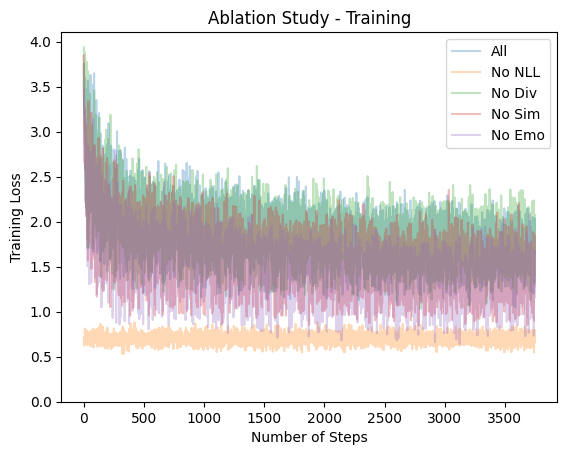

In [20]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#900C3F', '#4A328E']

with open("w-best_50epochs_loss.p", "rb") as f:
    [lr_loss_list, _, _, lr_dev_loss_list,lr_div_loss_list] = pickle.load(f)

with open("no_nll_30epochs_loss.p", "rb") as f:
    [lr1_loss_list, _, _, lr1_dev_loss_list, _] = pickle.load(f)

with open("no_div_30epochs_loss.p", "rb") as f:
    [lr2_loss_list, _, _, lr2_dev_loss_list, _] = pickle.load(f)

with open("no_sim_30epochs_loss.p", "rb") as f:
    [lr3_loss_list, _, _, lr3_dev_loss_list, _] = pickle.load(f)

with open("no_emo_30epochs_loss.p", "rb") as f:
    [lr4_loss_list, _, _, lr4_dev_loss_list, _] = pickle.load(f)


lr_list = ["All", "No NLL", "No Div", "No Sim", "No Emo"]
lrlen = len(lr1_loss_list)
lr_devlen = len(lr1_dev_loss_list)

loop = list(range(0, len(lr1_loss_list)))
dev_loop = list(range(0, len(lr1_dev_loss_list)))

plt.plot(loop, lr_loss_list[:lrlen], color=colors[0], alpha=.3, label=lr_list[0])

aloop = list(range(0, len(lr1_loss_list)))
adev_loop = list(range(0, len(lr1_dev_loss_list)))
plt.plot(aloop, lr1_loss_list, color=colors[1], alpha=.3, label=lr_list[1])

sloop = list(range(0, len(lr2_loss_list)))
sdev_loop = list(range(0, len(lr2_dev_loss_list)))
plt.plot(sloop, lr2_loss_list, color=colors[2], alpha=.3, label=lr_list[2])

loop3 = list(range(0, len(lr3_loss_list)))
dev_loop3 = list(range(0, len(lr3_dev_loss_list)))
plt.plot(loop3, lr3_loss_list, color=colors[3], alpha=.3, label=lr_list[3])

loop4 = list(range(0, len(lr4_loss_list)))
dev_loop4 = list(range(0, len(lr4_dev_loss_list)))
plt.plot(loop4, lr4_loss_list, color=colors[4], alpha=.3, label=lr_list[4])


plt.title("Ablation Study - Training")
plt.xlabel("Number of Steps")
plt.ylabel("Training Loss")
plt.ylim(bottom=0)
plt.legend()
plt.show()

## Validation

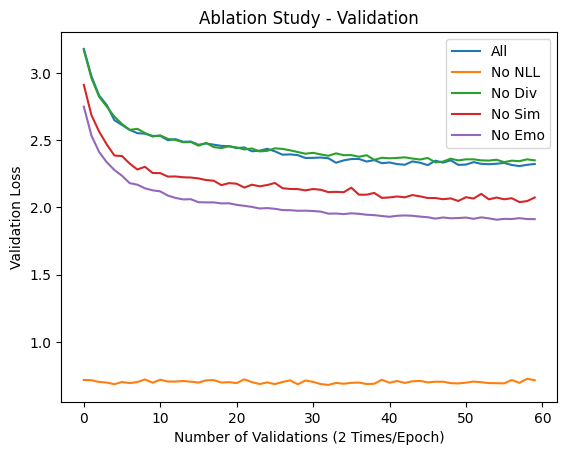

In [21]:
plt.plot(dev_loop, np.array(lr_dev_loss_list[:lr_devlen]), color=colors[0], label=lr_list[0])
plt.plot(adev_loop, np.array(lr1_dev_loss_list), color=colors[1], label=lr_list[1]) # no nll
plt.plot(sdev_loop, np.array(lr2_dev_loss_list), color=colors[2], label=lr_list[2]) # no div, testing
plt.plot(dev_loop3, np.array(lr3_dev_loss_list), color=colors[3], label=lr_list[3]) # no sim, testing
plt.plot(dev_loop4, np.array(lr4_dev_loss_list), color=colors[4], label=lr_list[4]) # no emo

plt.title("Ablation Study - Validation")
plt.xlabel("Number of Validations (2 Times/Epoch)")
plt.ylabel("Validation Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

# Ablation BLEURT

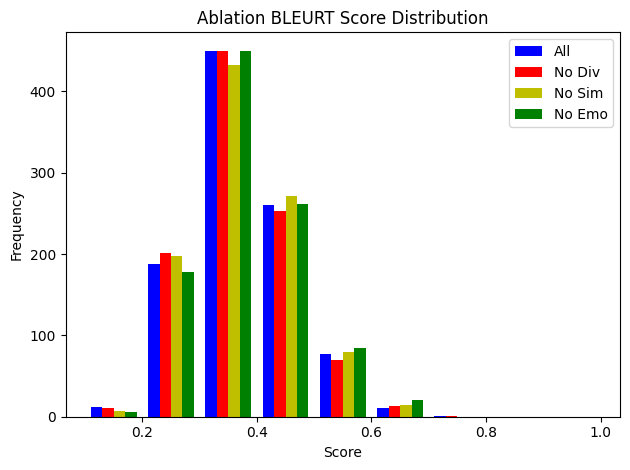

In [63]:
import numpy as np
import matplotlib.pyplot as plt

with open("w1-1-1-1-0_50epochs-4250-loss1.32314_bleurt_scores.p", "rb") as f:
    [ft_bleurt_scores] = pickle.load(f)

with open("no_div_30epochs-last_bleurt_scores.p", "rb") as f:
    [no_div_bleurt_scores] = pickle.load(f)

with open("no_sim_30epochs-last_bleurt_scores.p", "rb") as f:
    [no_sim_bleurt_scores] = pickle.load(f)

with open("no_emo_30epochs-last_bleurt_scores.p", "rb") as f:
    [no_emo_bleurt_scores] = pickle.load(f)



n_bins = 10
bins = np.array(range(1, 11)) / 10

fig, ((ax0)) = plt.subplots(nrows=1, ncols=1)

colors = ['b', 'r', 'y', 'g']#['red', 'b', 'y']
labels = ["All", "No Div", "No Sim", "No Emo"]
ax0.hist([ft_bleurt_scores, no_div_bleurt_scores, no_sim_bleurt_scores, no_emo_bleurt_scores], bins=bins, density=False, histtype='bar', color=colors, label=labels)
ax0.legend(prop={'size': 10})
plt.xlabel("Score")
plt.ylabel("Frequency")
ax0.set_title('Ablation BLEURT Score Distribution')

fig.tight_layout()
plt.show()

# Special Token
## Training

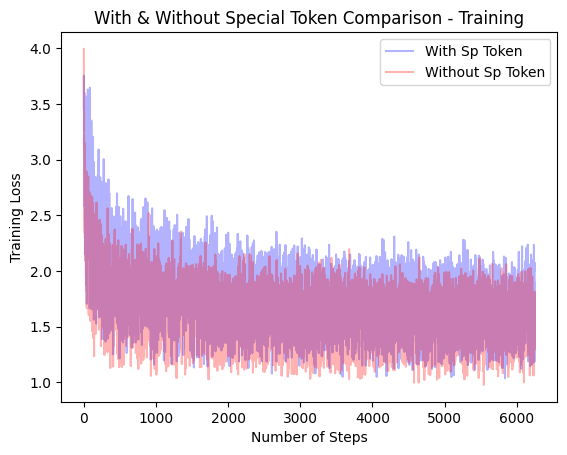

In [67]:
with open("w1-1-1-1-0_50epochs_loss.p", "rb") as f:
    [adam_loss_list, _, _, adam_dev_loss_list,adam_div_loss_list] = pickle.load(f)

with open("no_sp_token_50epochs_loss.p", "rb") as f:
    [adamw_loss_list, _, _, adamw_dev_loss_list, _] = pickle.load(f)


loop = list(range(0, len(adam_loss_list)))
dev_loop = list(range(0, len(adam_dev_loss_list)))

list_mean_dev_loss = get_batch_mean_dev_loss(adam_dev_loss_list, 20)
mean_dev_loop = list(range(0, len(list_mean_dev_loss)))

plt.plot(loop, adam_loss_list, 'b', alpha=.3, label="With Sp Token")

aloop = list(range(0, len(adamw_loss_list)))
adev_loop = list(range(0, len(adamw_dev_loss_list)))

plt.plot(aloop, adamw_loss_list, 'r', alpha=.3, label="Without Sp Token")


plt.title("With & Without Special Token Comparison - Training")
#plt.ylim(bottom=0, top=4)
plt.xlabel("Number of Steps")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

## Validation

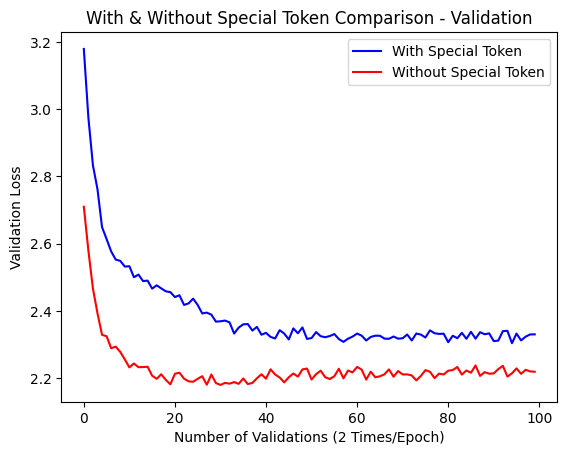

In [68]:
plt.plot(dev_loop, np.array(adam_dev_loss_list), 'b', label="With Special Token")
plt.plot(adev_loop, np.array(adamw_dev_loss_list), 'r', label="Without Special Token")
plt.title("With & Without Special Token Comparison - Validation")
plt.xlabel("Number of Validations (2 Times/Epoch)")
plt.ylabel("Validation Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

# PromCSE
## Training

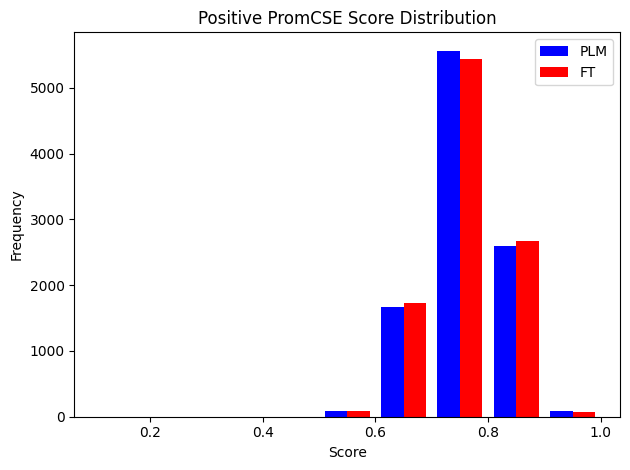

In [69]:
import numpy as np
import matplotlib.pyplot as plt

with open("w1-1-1-1-0_50epochs-4250-loss1.32314_promcse_scores.p", "rb") as f:
    [ft_promcse_scores, ft_promcse_neg_scores] = pickle.load(f)

with open("blenderbot_promcse_scores.p", "rb") as f:
    [bb_promcse_scores, bb_promcse_neg_scores] = pickle.load(f)


n_bins = 10
bins = np.array(range(1, 11)) / 10

fig, ((ax0)) = plt.subplots(nrows=1, ncols=1)

colors = ['b', 'r']#['red', 'b', 'y']
labels = ["PLM", "FT"]
ax0.hist([bb_promcse_scores, ft_promcse_scores], bins=bins, density=False, histtype='bar', color=colors, label=labels)
ax0.legend(prop={'size': 10})
plt.xlabel("Score")
plt.ylabel("Frequency")
ax0.set_title('Positive PromCSE Score Distribution')

fig.tight_layout()
plt.show()

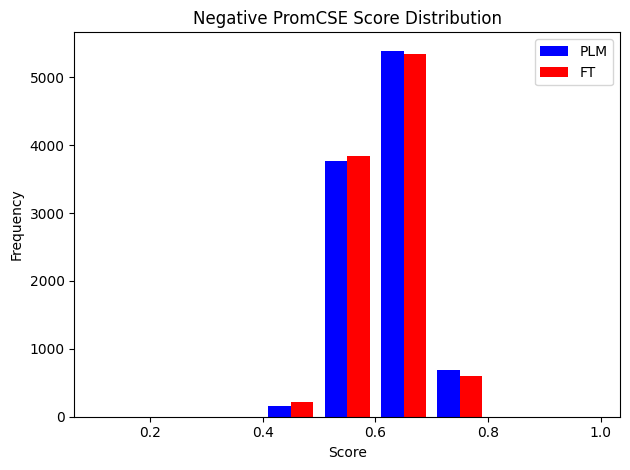

In [72]:
fig, ((ax0)) = plt.subplots(nrows=1, ncols=1)

colors = ['b', 'r']#['red', 'b', 'y']
labels = ["PLM", "FT"]
ax0.hist([bb_promcse_neg_scores, ft_promcse_neg_scores], bins=bins, density=False, histtype='bar', color=colors, label=labels)
ax0.legend(prop={'size': 10})
plt.xlabel("Score")
plt.ylabel("Frequency")
ax0.set_title('Negative PromCSE Score Distribution')

fig.tight_layout()
plt.show()

# Ablation Replication
## Training

In [50]:
def get_mean_std(path_pre="no_nll", path_suf="_30epochs_loss.p", rep=5):
    list_path = [f"{path_pre}{n}{path_suf}" for n in range(4)]
    list_path.append(f"{path_pre}{path_suf}")
    train_data_loss = []
    dev_data_loss = []

    for i in range(rep):
        with open(list_path[i], "rb") as f:
            [lr_loss_list, _, _, lr_dev_loss_list,lr_div_loss_list] = pickle.load(f)
        train_data_loss.append(lr_loss_list)
        dev_data_loss.append(lr_dev_loss_list)

    train_data_loss = np.array(train_data_loss)
    dev_data_loss = np.array(dev_data_loss)

    train_mean_loss = np.mean(train_data_loss, axis=0)
    dev_mean_loss = np.mean(dev_data_loss, axis=0)

    train_std_loss = np.std(train_data_loss, axis=0)
    dev_std_loss = np.std(dev_data_loss, axis=0)

    return train_mean_loss, dev_mean_loss, train_std_loss, dev_std_loss, train_data_loss, dev_data_loss

In [94]:
train_mean_loss0, dev_mean_loss0, train_std_loss0, dev_std_loss0, train_data_loss0, dev_data_loss0 = get_mean_std(path_pre="w-best", path_suf="_50epochs_loss.p", rep=5)
train_mean_loss1, dev_mean_loss1, train_std_loss1, dev_std_loss1, train_data_loss1, dev_data_loss1 = get_mean_std(path_pre="no_nll", path_suf="_30epochs_loss.p", rep=5)
train_mean_loss2, dev_mean_loss2, train_std_loss2, dev_std_loss2, train_data_loss2, dev_data_loss2 = get_mean_std(path_pre="no_div", path_suf="_30epochs_loss.p", rep=5)
train_mean_loss3, dev_mean_loss3, train_std_loss3, dev_std_loss3, train_data_loss3, dev_data_loss3 = get_mean_std(path_pre="no_sim", path_suf="_30epochs_loss.p", rep=5)
train_mean_loss4, dev_mean_loss4, train_std_loss4, dev_std_loss4, train_data_loss4, dev_data_loss4 = get_mean_std(path_pre="no_emo", path_suf="_30epochs_loss.p", rep=5)

In [95]:
l = len(train_std_loss1)
std_list_minmax = [max(train_std_loss0[:l]),
min(train_std_loss0[:l]), max(train_std_loss1), min(train_std_loss1),
max(train_std_loss2),
min(train_std_loss2),
max(train_std_loss3),
min(train_std_loss3),
max(train_std_loss4),
min(train_std_loss4)]
print(max(std_list_minmax))
print(min(std_list_minmax))

0.65347296
0.0041438355


In [96]:
l2 = len(dev_std_loss1)
dev_std_list_minmax = [max(dev_std_loss0[:l2]),
min(dev_std_loss0[:l2]), max(dev_std_loss1), min(dev_std_loss1),
max(dev_std_loss2),
min(dev_std_loss2),
max(dev_std_loss3),
min(dev_std_loss3),
max(dev_std_loss4),
min(dev_std_loss4)]
print(max(dev_std_list_minmax))
print(min(dev_std_list_minmax))

0.024877576
0.0030148602


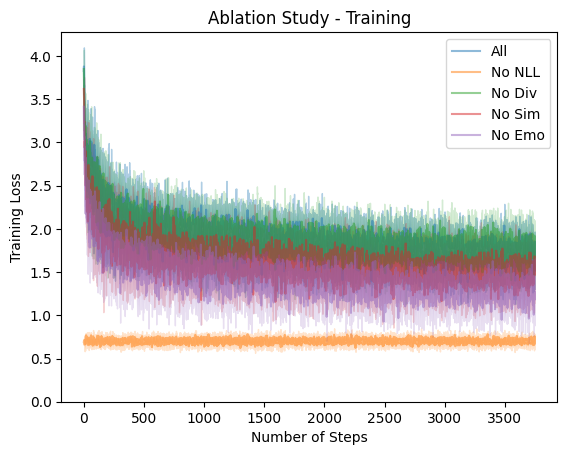

In [25]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#900C3F', '#4A328E']
lr_list = ["All", "No NLL", "No Div", "No Sim", "No Emo"]

ablen = len(train_mean_loss1)
dev_ablen = len(dev_mean_loss1)
loop = list(range(0, len(train_mean_loss1)))
dev_loop = list(range(0, len(dev_mean_loss1)))
plt.plot(loop, train_mean_loss0[:ablen], color=colors[0], alpha=.5, label=lr_list[0])
plt.fill_between(loop, train_mean_loss0[:ablen]+train_std_loss0[:ablen], train_mean_loss0[:ablen]-train_std_loss0[:ablen], color=colors[0],alpha=.35)

loop1 = list(range(0, len(train_mean_loss1)))
dev_loop1 = list(range(0, len(dev_mean_loss1)))
plt.plot(loop1, train_mean_loss1, color=colors[1], alpha=.5, label=lr_list[1])
plt.fill_between(loop1, train_mean_loss1+train_std_loss1, train_mean_loss1-train_std_loss1, color=colors[1], alpha=.2)

loop2 = list(range(0, len(train_mean_loss2)))
dev_loop2 = list(range(0, len(dev_mean_loss2)))
plt.plot(loop2, train_mean_loss2, color=colors[2], alpha=.5, label=lr_list[2])
plt.fill_between(loop2, train_mean_loss2+train_std_loss2, train_mean_loss2-train_std_loss2, color=colors[2], alpha=.2)

loop3 = list(range(0, len(train_mean_loss3)))
dev_loop3 = list(range(0, len(dev_mean_loss3)))
plt.plot(loop3, train_mean_loss3, color=colors[3], alpha=.5, label=lr_list[3])
plt.fill_between(loop3, train_mean_loss3+train_std_loss3, train_mean_loss3-train_std_loss3, color=colors[3], alpha=.2)

loop4 = list(range(0, len(train_mean_loss4)))
dev_loop4 = list(range(0, len(dev_mean_loss4)))
plt.plot(loop4, train_mean_loss4, color=colors[4], alpha=.5, label=lr_list[4])
plt.fill_between(loop4, train_mean_loss4+train_std_loss4, train_mean_loss4-train_std_loss4, color=colors[4], alpha=.2)

plt.title("Ablation Study - Training")
plt.xlabel("Number of Steps")
plt.ylabel("Training Loss")
plt.ylim(bottom=0)
plt.legend()
plt.show()


## Validation

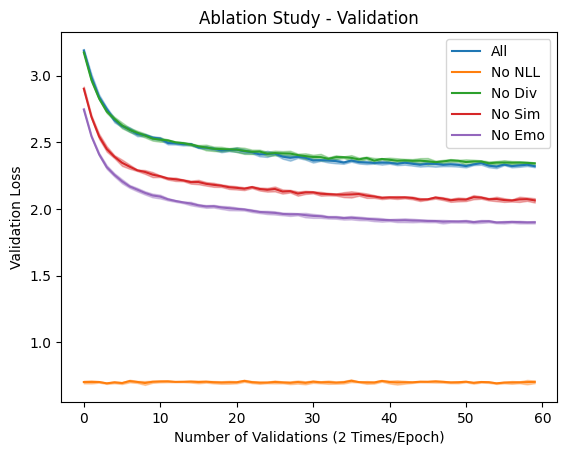

In [26]:
plt.plot(dev_loop, np.array(dev_mean_loss0)[:dev_ablen], color=colors[0], label=lr_list[0])# no nll
plt.fill_between(dev_loop, dev_mean_loss0[:dev_ablen]+dev_std_loss0[:dev_ablen], dev_mean_loss0[:dev_ablen]-dev_std_loss0[:dev_ablen], color=colors[0], alpha=.35)

plt.plot(dev_loop1, np.array(dev_mean_loss1), color=colors[1], label=lr_list[1]) # no div
plt.fill_between(dev_loop1, dev_mean_loss1+dev_std_loss1, dev_mean_loss1-dev_std_loss1, color=colors[1], alpha=.35)

plt.plot(dev_loop2, np.array(dev_mean_loss2), color=colors[2], label=lr_list[2]) # no sim
plt.fill_between(dev_loop2, dev_mean_loss2+dev_std_loss2, dev_mean_loss2-dev_std_loss2, color=colors[2], alpha=.35)

plt.plot(dev_loop3, np.array(dev_mean_loss3), color=colors[3], label=lr_list[3]) # no emo
plt.fill_between(dev_loop3, dev_mean_loss3+dev_std_loss3, dev_mean_loss3-dev_std_loss3, color=colors[3], alpha=.35)

plt.plot(dev_loop4, np.array(dev_mean_loss4), color=colors[4], label=lr_list[4]) # no emo
plt.fill_between(dev_loop4, dev_mean_loss4+dev_std_loss4, dev_mean_loss4-dev_std_loss4, color=colors[4], alpha=.35)

plt.title("Ablation Study - Validation")
plt.xlabel("Number of Validations (2 Times/Epoch)")
plt.ylabel("Validation Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

In [97]:
from scipy import stats
import numpy as np

l = len(train_data_loss1)
l2 = len(dev_data_loss1)
trim_train_data_loss0 = [td[:l] for td in train_data_loss0]
trim_dev_data_loss0 = [dd[:l2] for dd in dev_data_loss0]
tdl0 = np.array(trim_train_data_loss0).flatten()
tdl1 = np.array(train_data_loss1).flatten()
tdl2 = np.array(train_data_loss2).flatten()
tdl3 = np.array(train_data_loss3).flatten()
tdl4 = np.array(train_data_loss4).flatten()
ddl0 = np.array(trim_dev_data_loss0).flatten()
ddl1 = np.array(dev_data_loss1).flatten()
ddl2 = np.array(dev_data_loss2).flatten()
ddl3 = np.array(dev_data_loss3).flatten()
ddl4 = np.array(dev_data_loss4).flatten()
print("Train: ")
print(stats.ttest_ind(tdl0,tdl1).pvalue)
print(stats.ttest_ind(tdl0,tdl2).pvalue)
print(stats.ttest_ind(tdl0,tdl3).pvalue)
print(stats.ttest_ind(tdl0,tdl4).pvalue)
print("Dev: ")
print(stats.ttest_ind(ddl0,ddl1).pvalue)
print(stats.ttest_ind(ddl0,ddl2).pvalue)
print(stats.ttest_ind(ddl0,ddl3).pvalue)
print(stats.ttest_ind(ddl0,ddl4).pvalue)

Train: 
0.0
2.4522429289625112e-154
7.12146049688851e-197
6.835666079000115e-239
Dev: 
0.0
1.8190649920410357e-32
2.0037079467020895e-65
3.4658999422215996e-80


# Datasets Replication

In [105]:
train_mean_loss0, dev_mean_loss0, train_std_loss0, dev_std_loss0, train_data_loss0, dev_data_loss0 = get_mean_std(path_pre="w-best", path_suf="_50epochs_loss.p", rep=5)
train_mean_loss1, dev_mean_loss1, train_std_loss1, dev_std_loss1, train_data_loss1, dev_data_loss1 = get_mean_std(path_pre="AM", path_suf="_50epochs_loss.p", rep=5)
train_mean_loss2, dev_mean_loss2, train_std_loss2, dev_std_loss2, train_data_loss2, dev_data_loss2 = get_mean_std(path_pre="CC", path_suf="_50epochs_loss.p", rep=5)
train_mean_loss3, dev_mean_loss3, train_std_loss3, dev_std_loss3, train_data_loss3, dev_data_loss3 = get_mean_std(path_pre="Prosocial", path_suf="_50epochs_loss.p", rep=5)

In [106]:
std_list_minmax = [max(train_std_loss0),
min(train_std_loss0), max(train_std_loss1), min(train_std_loss1),
max(train_std_loss2),
min(train_std_loss2),
max(train_std_loss3),
min(train_std_loss3),]
print(max(std_list_minmax))
print(min(std_list_minmax))

0.7864934
0.014296972


In [107]:
dev_std_list_minmax = [max(dev_std_loss0),
min(dev_std_loss0), max(dev_std_loss1), min(dev_std_loss1),
max(dev_std_loss2),
min(dev_std_loss2),
max(dev_std_loss3),
min(dev_std_loss3),]
print(max(dev_std_list_minmax))
print(min(dev_std_list_minmax))

0.02641116
0.0016386339


## Training

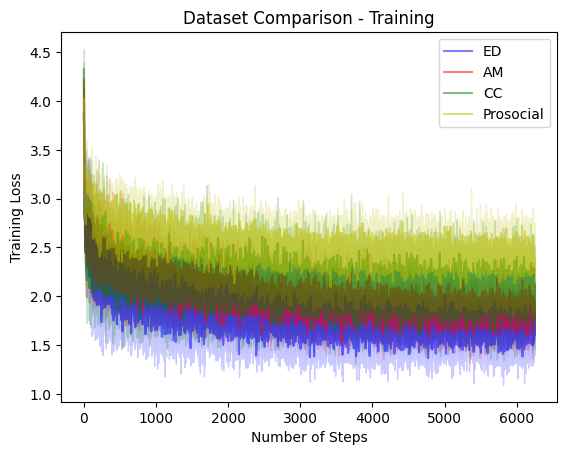

In [112]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#900C3F', '#4A328E']
colors = ['b', 'r', 'g', 'y']
lr_list = ["ED", "AM", "CC", "Prosocial"]

ablen = len(train_mean_loss1)
dev_ablen = len(dev_mean_loss1)
loop = list(range(0, len(train_mean_loss1)))
dev_loop = list(range(0, len(dev_mean_loss1)))
plt.plot(loop, train_mean_loss0[:ablen], color=colors[0], alpha=.5, label=lr_list[0])
plt.fill_between(loop, train_mean_loss0[:ablen]+train_std_loss0[:ablen], train_mean_loss0[:ablen]-train_std_loss0[:ablen], color=colors[0],alpha=.2)

loop1 = list(range(0, len(train_mean_loss1)))
dev_loop1 = list(range(0, len(dev_mean_loss1)))
plt.plot(loop1, train_mean_loss1, color=colors[1], alpha=.5, label=lr_list[1])
plt.fill_between(loop1, train_mean_loss1+train_std_loss1, train_mean_loss1-train_std_loss1, color=colors[1], alpha=.2)

loop2 = list(range(0, len(train_mean_loss2)))
dev_loop2 = list(range(0, len(dev_mean_loss2)))
plt.plot(loop2, train_mean_loss2, color=colors[2], alpha=.5, label=lr_list[2])
plt.fill_between(loop2, train_mean_loss2+train_std_loss2, train_mean_loss2-train_std_loss2, color=colors[2], alpha=.2)

loop3 = list(range(0, len(train_mean_loss3)))
dev_loop3 = list(range(0, len(dev_mean_loss3)))
plt.plot(loop3, train_mean_loss3, color=colors[3], alpha=.5, label=lr_list[3])
plt.fill_between(loop3, train_mean_loss3+train_std_loss3, train_mean_loss3-train_std_loss3, color=colors[3], alpha=.2)

plt.title("Dataset Comparison - Training")
#plt.ylim(bottom=0, top=4)
plt.xlabel("Number of Steps")
plt.ylabel("Training Loss")
plt.legend()
plt.show()


## Validation

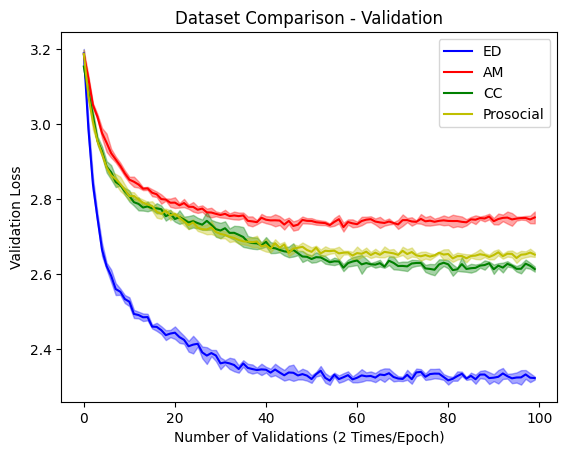

In [113]:
plt.plot(dev_loop, np.array(dev_mean_loss0)[:dev_ablen], color=colors[0], label=lr_list[0])
plt.fill_between(dev_loop, dev_mean_loss0[:dev_ablen]+dev_std_loss0[:dev_ablen], dev_mean_loss0[:dev_ablen]-dev_std_loss0[:dev_ablen], color=colors[0], alpha=.35)

plt.plot(dev_loop1, np.array(dev_mean_loss1), color=colors[1], label=lr_list[1])
plt.fill_between(dev_loop1, dev_mean_loss1+dev_std_loss1, dev_mean_loss1-dev_std_loss1, color=colors[1], alpha=.35)

plt.plot(dev_loop2, np.array(dev_mean_loss2), color=colors[2], label=lr_list[2])
plt.fill_between(dev_loop2, dev_mean_loss2+dev_std_loss2, dev_mean_loss2-dev_std_loss2, color=colors[2], alpha=.35)

plt.plot(dev_loop3, np.array(dev_mean_loss3), color=colors[3], label=lr_list[3])
plt.fill_between(dev_loop3, dev_mean_loss3+dev_std_loss3, dev_mean_loss3-dev_std_loss3, color=colors[3], alpha=.35)

plt.title("Dataset Comparison - Validation")
plt.xlabel("Number of Validations (2 Times/Epoch)")
plt.ylabel("Validation Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

In [115]:
from scipy import stats
import numpy as np

l = len(train_data_loss1)
tdl0 = np.array(train_data_loss0).flatten()
tdl1 = np.array(train_data_loss1).flatten()
tdl2 = np.array(train_data_loss2).flatten()
tdl3 = np.array(train_data_loss3).flatten()
ddl0 = np.array(dev_data_loss0).flatten()
ddl1 = np.array(dev_data_loss1).flatten()
ddl2 = np.array(dev_data_loss2).flatten()
ddl3 = np.array(dev_data_loss3).flatten()
print("Train: ")
print(stats.ttest_ind(tdl0,tdl1).pvalue)
print(stats.ttest_ind(tdl0,tdl2).pvalue)
print(stats.ttest_ind(tdl0,tdl3).pvalue)
print("Dev: ")
print(stats.ttest_ind(ddl0,ddl1).pvalue)
print(stats.ttest_ind(ddl0,ddl2).pvalue)
print(stats.ttest_ind(ddl0,ddl3).pvalue)

Train: 
0.0
0.0
0.0
Dev: 
1.2876248761818458e-295
3.419348953788491e-201
1.0489733568463429e-221


# With & Without Context Replication

In [70]:
train_mean_loss0, dev_mean_loss0, train_std_loss0, dev_std_loss0, train_data_loss0, dev_data_loss0 = get_mean_std(path_pre="no_conv", path_suf="_50epochs_loss.p", rep=5)
train_mean_loss1, dev_mean_loss1, train_std_loss1, dev_std_loss1, train_data_loss1, dev_data_loss1 = get_mean_std(path_pre="w-best", path_suf="_50epochs_loss.p", rep=5)

In [49]:
dev_std_list_minmax = [max(dev_std_loss0),
min(dev_std_loss0), max(dev_std_loss1), min(dev_std_loss1)]
print(max(dev_std_list_minmax))
print(min(dev_std_list_minmax))

0.026221253
0.0030674636


## Training

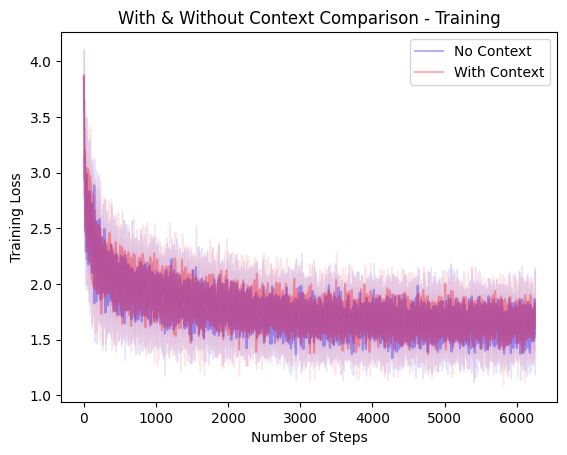

In [38]:
colors = ['b', 'r','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#900C3F', '#4A328E']
lr_list = ["No Context", "With Context"]


loop = list(range(0, len(train_mean_loss1)))
dev_loop = list(range(0, len(dev_mean_loss1)))
plt.plot(loop, train_mean_loss0, color=colors[0], alpha=.3, label=lr_list[0])
plt.fill_between(loop, train_mean_loss0+train_std_loss0, train_mean_loss0-train_std_loss0, color=colors[0],alpha=.1)

loop1 = list(range(0, len(train_mean_loss1)))
dev_loop1 = list(range(0, len(dev_mean_loss1)))
plt.plot(loop1, train_mean_loss1, color=colors[1], alpha=.3, label=lr_list[1])
plt.fill_between(loop1, train_mean_loss1+train_std_loss1, train_mean_loss1-train_std_loss1, color=colors[1], alpha=.1)

plt.title("With & Without Context Comparison - Training")
#plt.ylim(bottom=0, top=4)
plt.xlabel("Number of Steps")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

## Validation

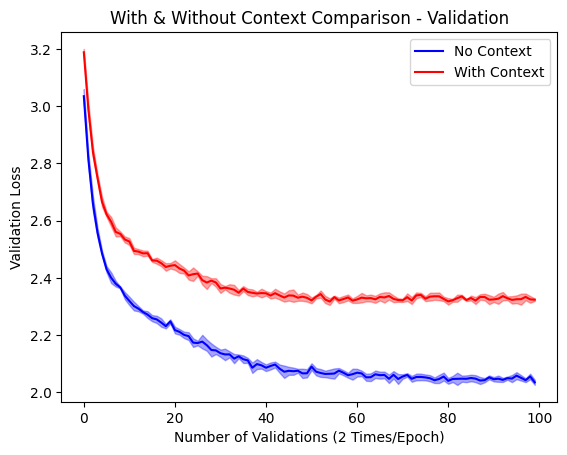

In [39]:
plt.plot(dev_loop, np.array(dev_mean_loss0), color=colors[0], label=lr_list[0])# no conv
plt.fill_between(dev_loop, dev_mean_loss0+dev_std_loss0, dev_mean_loss0-dev_std_loss0, color=colors[0], alpha=.35)

plt.plot(dev_loop1, np.array(dev_mean_loss1), color=colors[1], label=lr_list[1]) # with conv
plt.fill_between(dev_loop1, dev_mean_loss1+dev_std_loss1, dev_mean_loss1-dev_std_loss1, color=colors[1], alpha=.35)

plt.title("With & Without Context Comparison - Validation")
plt.xlabel("Number of Validations (2 Times/Epoch)")
plt.ylabel("Validation Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

In [72]:
from scipy import stats
import numpy as np

tdl0 = np.array(train_data_loss0).flatten()
tdl1 = np.array(train_data_loss1).flatten()
ddl0 = np.array(dev_data_loss0).flatten()
ddl1 = np.array(dev_data_loss1).flatten()
print("Train: ")
print(stats.ttest_ind(tdl0,tdl1).pvalue)
print("Dev: ")
print(stats.ttest_ind(ddl0,ddl1).pvalue)
#len(tdl0)

Train: 
5.113647002363555e-42
Dev: 
3.7278324576260197e-112


# With & Without Emotion Special Token Replication
## Training

In [81]:
train_mean_loss0, dev_mean_loss0, train_std_loss0, dev_std_loss0, train_data_loss0, dev_data_loss0 = get_mean_std(path_pre="w-best", path_suf="_50epochs_loss.p", rep=5)
train_mean_loss1, dev_mean_loss1, train_std_loss1, dev_std_loss1, train_data_loss1, dev_data_loss1 = get_mean_std(path_pre="no_sp_token", path_suf="_50epochs_loss.p", rep=5)

In [83]:
dev_std_list_minmax = [max(dev_std_loss0),
min(dev_std_loss0), max(dev_std_loss1), min(dev_std_loss1)]
print(max(dev_std_list_minmax))
print(min(dev_std_list_minmax))

0.023487695
0.003391032


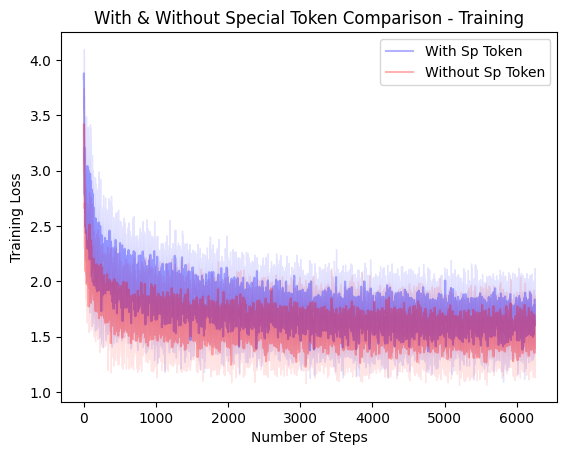

In [78]:
colors = ['b', 'r','#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#900C3F', '#4A328E']
lr_list = ["With Sp Token", "Without Sp Token"]


loop = list(range(0, len(train_mean_loss1)))
dev_loop = list(range(0, len(dev_mean_loss1)))
plt.plot(loop, train_mean_loss0, color=colors[0], alpha=.3, label=lr_list[0])
plt.fill_between(loop, train_mean_loss0+train_std_loss0, train_mean_loss0-train_std_loss0, color=colors[0],alpha=.1)

loop1 = list(range(0, len(train_mean_loss1)))
dev_loop1 = list(range(0, len(dev_mean_loss1)))
plt.plot(loop1, train_mean_loss1, color=colors[1], alpha=.3, label=lr_list[1])
plt.fill_between(loop1, train_mean_loss1+train_std_loss1, train_mean_loss1-train_std_loss1, color=colors[1], alpha=.1)

plt.title("With & Without Special Token Comparison - Training")
#plt.ylim(bottom=0, top=4)
plt.xlabel("Number of Steps")
plt.ylabel("Training Loss")
plt.legend()
plt.show()

## Validation

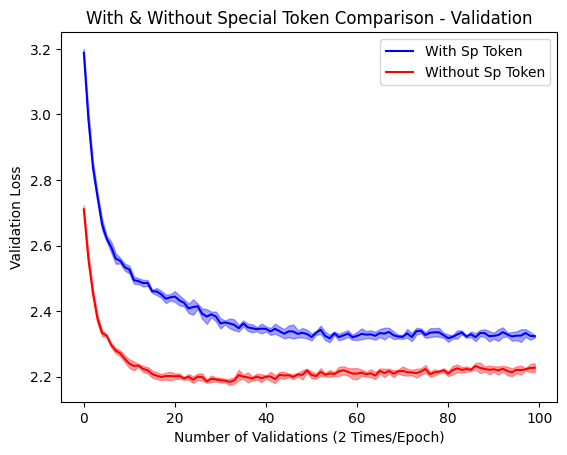

In [79]:
plt.plot(dev_loop, np.array(dev_mean_loss0), color=colors[0], label=lr_list[0])# with sp token
plt.fill_between(dev_loop, dev_mean_loss0+dev_std_loss0, dev_mean_loss0-dev_std_loss0, color=colors[0], alpha=.35)

plt.plot(dev_loop1, np.array(dev_mean_loss1), color=colors[1], label=lr_list[1]) # no sp token
plt.fill_between(dev_loop1, dev_mean_loss1+dev_std_loss1, dev_mean_loss1-dev_std_loss1, color=colors[1], alpha=.35)

plt.title("With & Without Special Token Comparison - Validation")
plt.xlabel("Number of Validations (2 Times/Epoch)")
plt.ylabel("Validation Loss")
#plt.ylim(bottom=0, top=4)
plt.legend()
plt.show()

In [82]:
from scipy import stats
import numpy as np

tdl0 = np.array(train_data_loss0).flatten()
tdl1 = np.array(train_data_loss1).flatten()
ddl0 = np.array(dev_data_loss0).flatten()
ddl1 = np.array(dev_data_loss1).flatten()
print("Train: ")
print(stats.ttest_ind(tdl0,tdl1).pvalue)
print("Dev: ")
print(stats.ttest_ind(ddl0,ddl1).pvalue)

Train: 
0.0
Dev: 
8.694492562420481e-101


# RL

In [103]:
from datasets import Dataset
import numpy as np
def get_rl_mean_std(path_pre="ppo_short", path_suf="_mean_score_list.p", rep=5):
    list_path = [f"{path_pre}{n}{path_suf}" for n in range(rep)]
    train_rewards = []

    for i in range(rep):
        with open(list_path[i], "rb") as f:
            [mean_score_list, mean_emo_list, adam_mean_score_list, adamw_mean_score_list, stats, _] = pickle.load(f)
        stats = Dataset.from_list(stats)
        stats_mean_scores = stats["ppo/mean_scores"]
        train_rewards.append(stats_mean_scores)

    train_rewards = np.array(train_rewards)

    train_mean_rewards = np.mean(train_rewards, axis=0)
    train_std_rewards = np.std(train_rewards, axis=0)

    return train_mean_rewards, train_std_rewards

In [104]:
train_mean_rewards0, train_std_rewards0 = get_rl_mean_std(path_pre="ppo_short", path_suf="_mean_score_list.p", rep=5)

In [109]:
train_mean_rewards0, train_std_rewards0

(array([ 7.9375, 23.375 , 16.125 , 25.6875, 31.3125, 33.375 , 34.75  ,
        35.    , 35.    , 34.5625, 35.    , 35.    , 35.    , 35.    ,
        35.    , 35.    , 35.    , 24.5   , 34.9375, 33.75  , 34.5625,
        34.5625, 34.875 , 34.5625, 35.    , 35.    , 34.4375, 34.5625,
        34.9375, 35.    , 35.    , 34.9375, 33.125 , 34.8125, 11.375 ,
        15.8125, 23.5625, 34.9375, 34.    , 34.8125, 35.    , 31.3125,
        35.    , 35.    , 22.8125, 23.75  , 34.3125, 35.    , 13.75  ,
        27.    , 27.    , 13.    , 13.5   , 14.    , 16.625 , 20.    ,
        26.    , 35.    , 35.    , 35.    , 24.625 , 35.    , 35.    ,
        20.    , 32.5625, 35.    , 34.375 , 34.1875, 35.    , 29.6875,
        34.9375, 17.0625, 35.    , 35.    , 35.    , 35.    , 28.5   ,
        33.75  , 26.0625, 34.625 , 35.    , 35.    , 26.1875, 35.    ,
        27.9375, 35.    , 35.    , 34.5   , 31.5625, 29.0625, 34.75  ,
        35.    , 34.5625, 27.9375, 29.4375, 35.    , 34.8125, 23.0625,
      

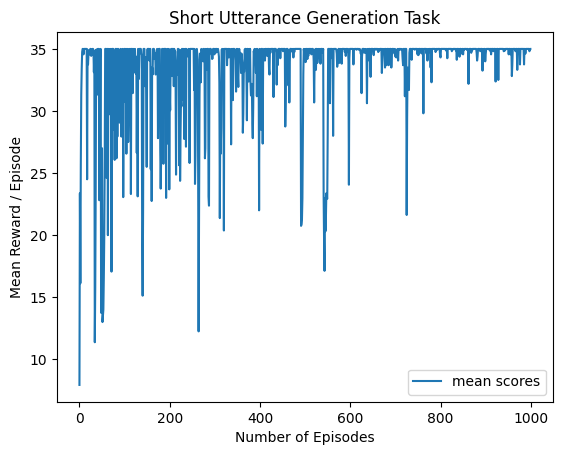

In [110]:
x = list(range(0, len(train_mean_rewards0)))
plt.plot(x, train_mean_rewards0, label="mean scores", alpha=1,)
plt.fill_between(x, train_mean_rewards0+train_std_rewards0, train_mean_rewards0-train_std_rewards0, alpha=.35,)

plt.title("Short Utterance Generation Task")
plt.xlabel("Number of Episodes")
plt.ylabel("Mean Reward / Episode")
plt.legend()
plt.show()


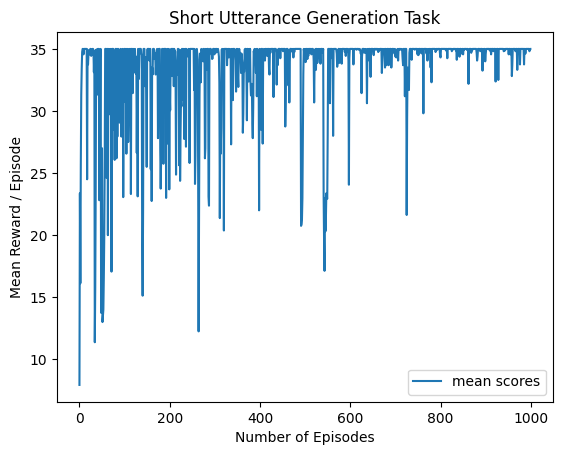

In [27]:
from datasets import Dataset
import numpy as np
with open("PPO25-8_ED_ts2000_ep1000_inner4_share4_scale1_empathy_clean_count0.4_emoDis1_FACE1_bertSim1_Adam_bs4_lr5e-05_gamma1_mean_score_list.p", "rb") as f:
    [mean_score_list, mean_emo_list, adam_mean_score_list, adamw_mean_score_list, stats, _] = pickle.load(f)


stats = Dataset.from_list(stats)
stats_mean_scores = np.array(stats["ppo/mean_scores"]) #+ np.array(stats["ppo/mean_non_score_reward"])

stats_obj_kl = stats["objective/kl"]

x = list(range(0, len(stats_mean_scores)))

#plt.plot(x,)
#plt.plot(x, stats_obj_kl, label="obj kl")
plt.plot(x, stats_mean_scores, label="mean scores")
plt.title("Short Utterance Generation Task")
plt.xlabel("Number of Episodes")
plt.ylabel("Mean Reward / Episode")
plt.legend()
plt.show()

In [33]:
from transformers import AutoModelForSeq2SeqLM

load_path_prefix = "../../../"
model = AutoModelForSeq2SeqLM.from_pretrained(f"{load_path_prefix}models/local-facebook-blenderbot-400M-distill", torch_dtype=torch.float32)
print(model)

BlenderbotForConditionalGeneration(
  (model): BlenderbotModel(
    (shared): Embedding(8008, 1280, padding_idx=0)
    (encoder): BlenderbotEncoder(
      (embed_tokens): Embedding(8008, 1280, padding_idx=0)
      (embed_positions): BlenderbotLearnedPositionalEmbedding(128, 1280)
      (layers): ModuleList(
        (0-1): 2 x BlenderbotEncoderLayer(
          (self_attn): BlenderbotAttention(
            (k_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (v_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (q_proj): Linear(in_features=1280, out_features=1280, bias=True)
            (out_proj): Linear(in_features=1280, out_features=1280, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1280,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=1280, out_features=5120, bias=True)
          (fc2): Linear(in_features=5120, out_features=1280, bias=True)
     